# Exploratory Visualization of the Cars Dataset

## Imports

In [1]:
import pandas as pd
from altair import *

## Load the dataset

In [2]:
cars = load_dataset('cars')

In [3]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Exploration

First, let's explore what makes a car perform well. In this case, the `Acceleration` column will be used as proxy for performance. First, let's look at how acceleration is related to weight and the number of cylinders:

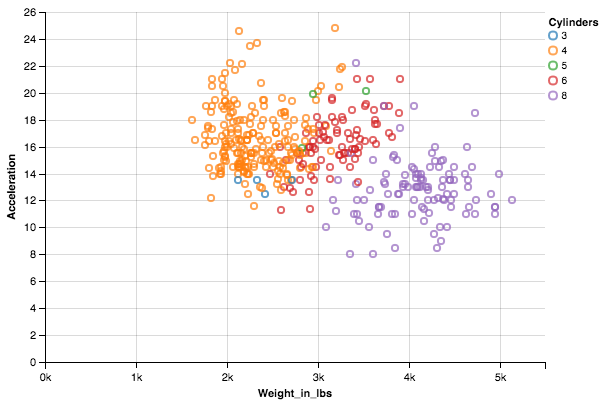

In [4]:
Chart(cars).mark_point().encode(
    x='Weight_in_lbs',
    y='Acceleration',
    color='Cylinders:N'
)

Here we see that lighter cars tends to have higher acceleration. This make sense from Newton's law which says that $a=F/m$.

Now look at the relationship between acceleration and displacement:

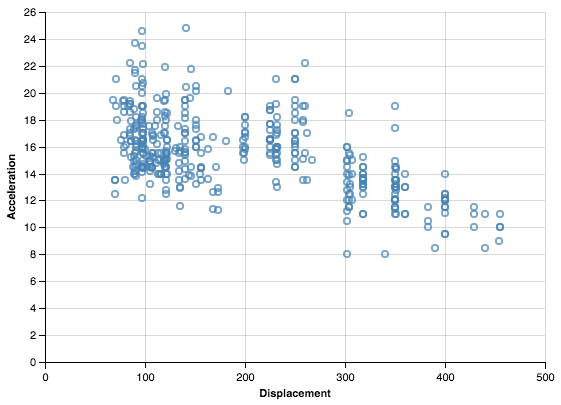

In [5]:
Chart(cars).mark_point().encode(
    x='Displacement',
    y='Acceleration',
)

This is a little surprising as you would expect larger displacement to be related to larger engines that have more horsepower, which would give rise to greater acceleration. Instead, larger engines have smaller acceleration. To understand what is going on, let's start to include both the horsepower and the geographical region in the visualization:

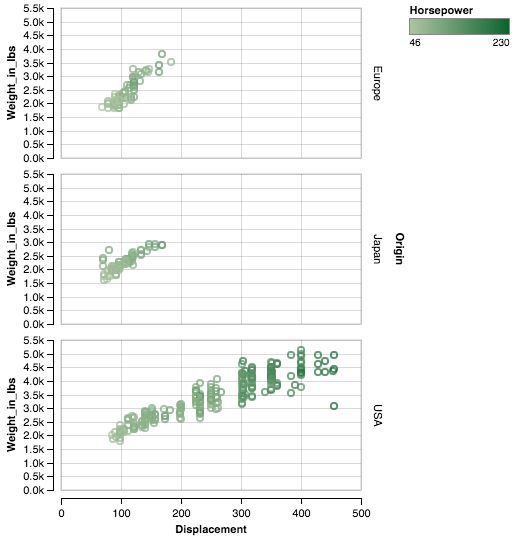

In [6]:
Chart(cars).mark_point().encode(
    x='Displacement',
    y='Weight_in_lbs',
    color='Horsepower',
    row='Origin'
).configure_cell(width=300, height=150)

This shows a lot:

1. The larger displayment engines that have more horsepower are from the United States.
2. The cars from Japan and Europe have smaller displacement/horsepower engine and are lighter.
3. It is exactly the large horsepower cars from the United States that are heavier. Thus, even though they have more horsepower, their excess weight causes them to be slower than their smaller horsepower peers.

Thus, it appears that one of the main trends in this dataset is the difference in cars between geographic regions. Let's see if this also holds true in the cylinders of the engines by looking at a normalized stacked bar chart:

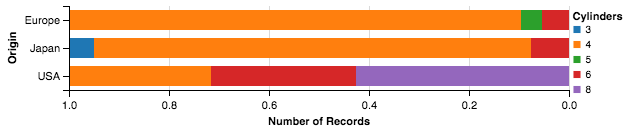

In [7]:
Chart(cars).mark_bar(stacked='normalize').encode(
    Y('Origin'),
    X('*:Q', aggregate='count', sort='descending'),
    Color('Cylinders:N')
)

This is pretty amazing; over 70% of the cars from the United States have 6 and 8 cylinder engines, while in Europe and Japan, no cars have 8 cylinders and less than 10% have 6! Obviously, this should have a huge effect on the fuel efficiency of the cars. Here is a histogram of the MPG grouped by the geographic region:

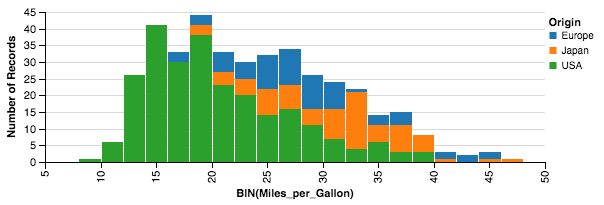

In [8]:
Chart(cars).mark_bar().encode(
    X('Miles_per_Gallon', bin=Bin(maxbins=20)),
    Y('*:Q', aggregate='count'),
    Color('Origin')
).configure_cell(height=150)

Here is some of this information as a table, with the text/color of the cell encoding the average MPG for that row and column:

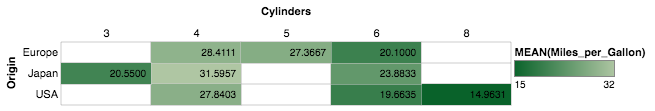

In [9]:
Chart(cars).mark_text(applyColorToBackground=True).encode(
    Row('Origin:O'),
    Column('Cylinders:O'),
    Color('mean(Miles_per_Gallon):Q', sort='descending'),
    Text('mean(Miles_per_Gallon):Q')
)

Finally, let's look at how the average MPG by origin is trending over time:

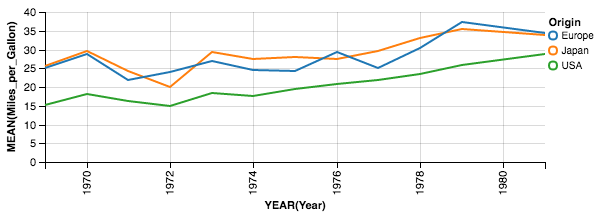

In [10]:
Chart(cars).mark_line().encode(
    X('Year:T', timeUnit='year'),
    Y('Miles_per_Gallon:Q', aggregate='mean'),
    Color('Origin:N')
).configure_cell(height=150)

Well, at least there is a steady increase in fuel efficiency in the United States.